In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

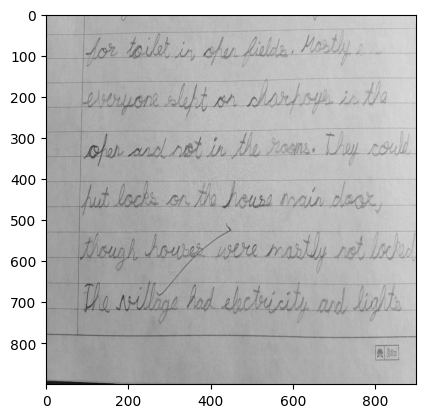

In [63]:
image=cv2.imread('temp.jpg')
img=image.copy()

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(900,900))
#img=255-img
plt.imshow(img,cmap='gray')

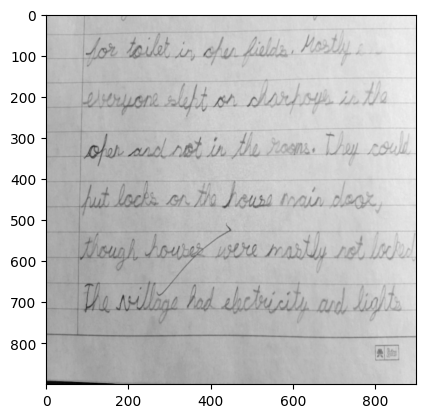

In [64]:
filtered_image= cv2.bilateralFilter(img, 5, 50, 50) 
plt.imshow(filtered_image,cmap='gray')

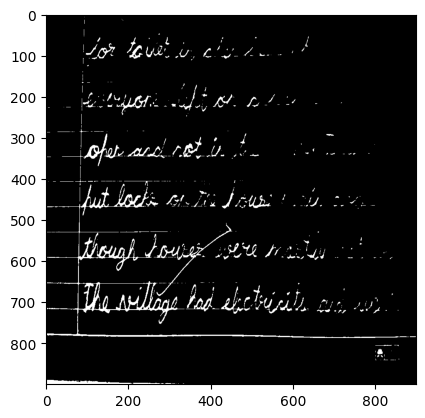

In [83]:
ret,threshold_img=cv2.threshold(filtered_image,135,255,cv2.THRESH_BINARY_INV)
#plt.imshow(threshold_img,cmap='gray')
# element=np.ones((5,5),np.uint8)
# threshold_img=cv2.dilate(threshold_img,element)
plt.imshow(threshold_img,cmap='gray')

In [76]:
letter_size=average_letter_size=var_letter_size=0
TOP_MARGIN=LINE_SPACING=WORD_SPACING=0.0
lines=list()

In [74]:
def horizontal_projection ()->list:
    (h,w)=np.shape(threshold_img)
    print(h,w)
    sum_rows=list()
    for j in range (0,h-1):
        row=threshold_img[j:j+1,0:w]
        sum_rows.append(np.sum(row))
    return sum_rows

In [84]:
hplist=horizontal_projection()
print(hplist)
topMargincount=0
for sum in hplist:
    if(sum<=255):
        topMargincount=topMargincount+1
    else:
        break
lineTop=0
lineBottom=0
spaceTop=0
SpaceBottom=0
setLineTop=True
setSpaceTop=True
includeNextSpace=True
space_zero=list()
for i in range(0,len(hplist)):
    if hplist[i]<3000:
        if setSpaceTop:
            spaceTop=i
            setSpaceTop=False
        SpaceBottom=i+1
        if i<len(hplist)-1:
            if(hplist[i+1]<3000):
                continue
        if includeNextSpace:
            space_zero.append(SpaceBottom-spaceTop)
        else:
            previous=0
            if(len(space_zero)==0):
                previous=0
            else:
                previous=space_zero.pop()
            space_zero.append(previous+SpaceBottom-lineTop)
        setSpaceTop=True
    if hplist[i]>3000:
        if setLineTop:
            lineTop=i
            setLineTop=False
        lineBottom=i+1
        if i<len(hplist)-1:
            if hplist[i+1]>3000:
                continue
            if(lineBottom-lineTop<20):
                includeNextSpace=False
                setLineTop=True
                continue
        includeNextSpace=True
        lines.append([lineTop,lineBottom])
        setLineTop=True
threshold=15000
new_space_row_count=0
total_row_count=0
total_line_count=0
flag=False
for i,line in enumerate(lines):
    segment=hplist[line[0]:line[1]]
    for j,sum in enumerate(segment):
        if sum<threshold:
            new_space_row_count=new_space_row_count+1
        else:
            total_row_count=total_row_count+1
            flag=True
    if flag:
        total_line_count=total_line_count+1
        flag=False
total_space_row_count=new_space_row_count+np.sum(space_zero[1:-1])
average_line_spacing=float(total_space_row_count)/total_line_count
var_line_spacing=new_space_row_count+np.var(space_zero[1:-1])






900 900
[0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 255, 0, 510, 510, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 510, 1020, 1275, 255, 255, 255, 0, 510, 255, 2040, 3060, 4335, 3570, 3315, 2295, 2805, 2805, 3315, 3570, 2550, 2550, 2550, 4590, 6120, 6885, 6885, 5355, 4080, 2805, 3570, 7650, 8160, 7650, 9945, 10455, 12750, 15045, 17085, 18870, 17340, 16575, 15300, 16320, 16575, 15810, 14025, 13770, 12495, 15555, 16830, 20145, 22185, 22440, 21675, 21420, 21675, 26775, 23970, 14280, 10455, 9945, 3570, 1275, 1020, 765, 510, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 510, 1020, 765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 1785, 3060, 510, 0, 510, 510, 510, 1020, 1020, 1275, 1275, 1020, 765, 1785, 1530, 1785, 1530, 1530, 1275, 1020, 1275, 1275, 1275, 765, 510, 510, 1530, 2550, 3315, 4335, 5610, 7905, 8

In [85]:
print(var_line_spacing)

287.04
